In [ ]:
# Install Kaggle API
!pip install kaggle


In [ ]:
# Upload Kaggle API token
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
# Move the uploaded Kaggle API token to the appropriate location and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia


100% 2.06G/2.06G [01:47<00:00, 20.4MB/s]
100% 2.06G/2.06G [01:47<00:00, 20.5MB/s]


In [ ]:
# Unzip the downloaded dataset
import zipfile
with zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image


In [ ]:
# Define the data paths
data_dir = '/content/dataset/Data/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')


In [ ]:

def load_data(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_dir = os.path.join(data_dir, category)
        for img in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (224, 224))  # resize images to (224, 224) for uniformity
            images.append(image)
            labels.append(category)
    return np.array(images), np.array(labels)

train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)


In [ ]:
# Preprocess data
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
test_labels_encoded = le.transform(test_labels)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels_encoded)
test_labels_cat = to_categorical(test_labels_encoded)


In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: COVID-19, Normal, Pneumonia
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
                                   shear_range=0.1, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
train_generator = train_datagen.flow(train_images, train_labels_cat, batch_size=32)


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=20, validation_data=(test_images, test_labels_cat))



Epoch 1/20
161/161 [==============================] - 71s 390ms/step - loss: 0.5907 - accuracy: 0.7597 - val_loss: 0.3281 - val_accuracy: 0.9076
Epoch 2/20
161/161 [==============================] - 60s 376ms/step - loss: 0.4271 - accuracy: 0.8254 - val_loss: 0.3209 - val_accuracy: 0.8859
Epoch 3/20
161/161 [==============================] - 61s 379ms/step - loss: 0.3822 - accuracy: 0.8495 - val_loss: 0.2281 - val_accuracy: 0.9224
Epoch 4/20
161/161 [==============================] - 59s 366ms/step - loss: 0.3489 - accuracy: 0.8629 - val_loss: 0.2333 - val_accuracy: 0.8960
Epoch 5/20
161/161 [==============================] - 59s 367ms/step - loss: 0.3248 - accuracy: 0.8734 - val_loss: 0.2239 - val_accuracy: 0.9169
Epoch 6/20
161/161 [==============================] - 88s 547ms/step - loss: 0.2991 - accuracy: 0.8894 - val_loss: 0.1879 - val_accuracy: 0.9293
Epoch 7/20
161/161 [==============================] - 64s 398ms/step - loss: 0.2865 - accuracy: 0.8935 - val_loss: 0.2072 - val_ac

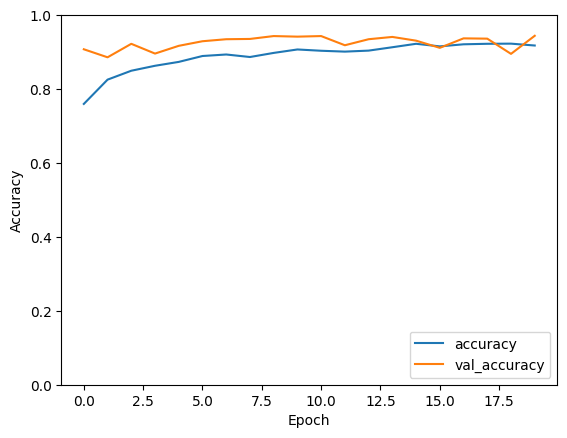

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


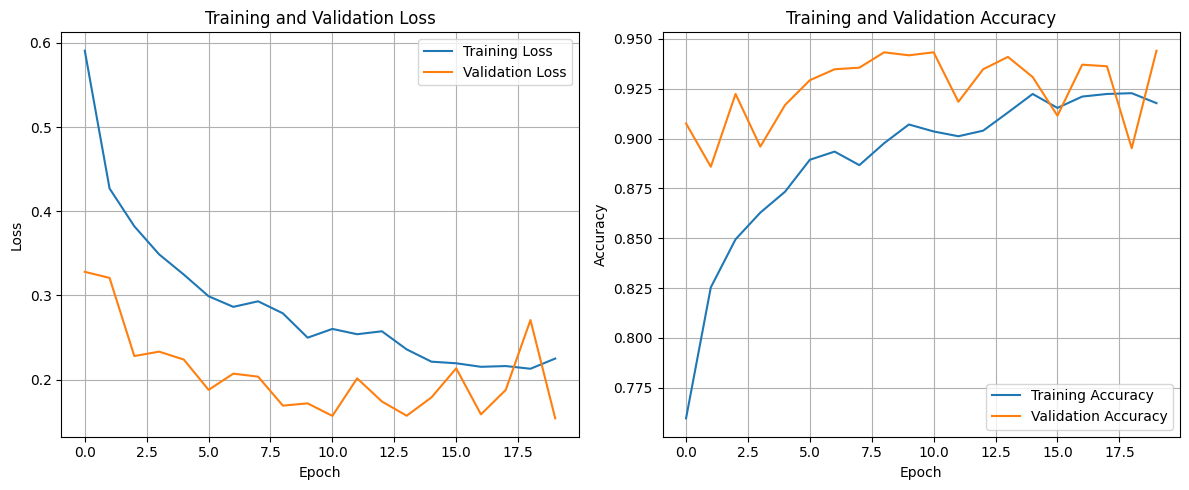

In [2]:
import matplotlib.pyplot as plt

# Define the training history
history = {
    'loss': [0.5907, 0.4271, 0.3822, 0.3489, 0.3248, 0.2991, 0.2865, 0.2931, 0.2788, 0.2499,
             0.2603, 0.2540, 0.2575, 0.2360, 0.2214, 0.2195, 0.2153, 0.2162, 0.2130, 0.2251],
    'accuracy': [0.7597, 0.8254, 0.8495, 0.8629, 0.8734, 0.8894, 0.8935, 0.8867, 0.8977, 0.9071,
                 0.9036, 0.9012, 0.9040, 0.9131, 0.9224, 0.9154, 0.9211, 0.9224, 0.9228, 0.9178],
    'val_loss': [0.3281, 0.3209, 0.2281, 0.2333, 0.2239, 0.1879, 0.2072, 0.2036, 0.1692, 0.1719,
                  0.1570, 0.2016, 0.1741, 0.1572, 0.1789, 0.2135, 0.1588, 0.1878, 0.2708, 0.1541],
    'val_accuracy': [0.9076, 0.8859, 0.9224, 0.8960, 0.9169, 0.9293, 0.9348, 0.9356, 0.9433, 0.9418,
                      0.9433, 0.9185, 0.9348, 0.9410, 0.9309, 0.9115, 0.9371, 0.9363, 0.8952, 0.9441]
}

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history['loss'], label='Training Loss')
axs[0].plot(history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot training and validation accuracy
axs[1].plot(history['accuracy'], label='Training Accuracy')
axs[1].plot(history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)

# Display overall accuracy
print(f"Overall Accuracy on Test Data: {test_acc * 100:.2f}%")


41/41 [==============================] - 1s 23ms/step - loss: 0.1541 - accuracy: 0.9441
Test accuracy: 0.9440993666648865
Overall Accuracy on Test Data: 94.41%


In [ ]:
from sklearn.metrics import classification_report

# Define class names
class_names = ['COVID-19', 'Normal', 'Pneumonia']

# Get class names instead of numbers
y_true_class_names = [class_names[i] for i in y_true]
y_pred_class_names = [class_names[i] for i in y_pred]

# Print classification report
print(classification_report(y_true_class_names, y_pred_class_names))


              precision    recall  f1-score   support

    COVID-19       1.00      0.94      0.97       116
      Normal       0.91      0.89      0.90       317
   Pneumonia       0.95      0.97      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.93      0.94      1288
weighted avg       0.94      0.94      0.94      1288



In [ ]:
# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_mat)


Confusion Matrix:
[[109   0   7]
 [  0 281  36]
 [  0  29 826]]


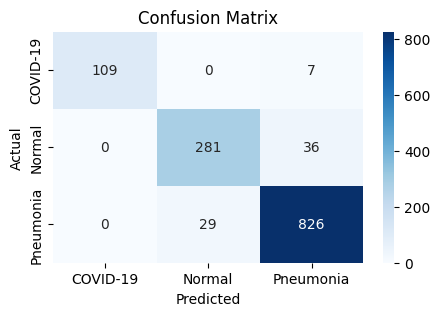

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix = np.array([[109, 0, 7],
                             [0, 281, 36],
                             [0, 29, 826]])

# Define class names
class_names = ['COVID-19', 'Normal', 'Pneumonia']

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model
model.save('/content/dicious_dectection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/dicious_dectection_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('path_to_save_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from google.colab import files

# Load the trained model
loaded_model = load_model('/content/dicious_dectection_model.h5')

# Define target labels
class_labels = ['COVID-19', 'Normal', 'Pneumonia']

# Function to preprocess uploaded image
def preprocess_image(img):
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.
    return img

# Upload an image
uploaded = files.upload()

# Get the uploaded image
for file_name in uploaded.keys():
    img = image.load_img(file_name, target_size=(224, 224))
    img_array = preprocess_image(img)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)
    predicted_class = class_labels[predicted_class_idx[0]]

    print('Predicted class:', predicted_class)


Saving PNEUMONIA_23.png to PNEUMONIA_23.png
1/1 [==============================] - 0s 19ms/step
Predicted class: Pneumonia


Saving NORMAL_2.png to NORMAL_2.png
1/1 [==============================] - 0s 79ms/step


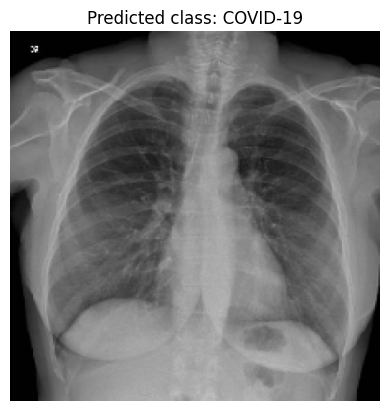

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

# Load the trained model
loaded_model = load_model('/content/dicious_dectection_model.h5')

# Define target labels
class_labels = ['COVID-19', 'Normal', 'Pneumonia']

# Function to preprocess uploaded image
def preprocess_image(img):
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.
    return img

# Upload an image
uploaded = files.upload()

# Get the uploaded image
for file_name in uploaded.keys():
    img = image.load_img(file_name, target_size=(224, 224))
    img_array = preprocess_image(img)

    # Make prediction
    predictions = loaded_model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)
    predicted_class = class_labels[predicted_class_idx[0]]

    # Plot the image with predicted class
    plt.imshow(img)
    plt.title('Predicted class: ' + predicted_class)
    plt.axis('off')
    plt.show()
